In [2]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine
from collections import defaultdict
from gensim.models import KeyedVectors
import seaborn as sns

file_path = '/Users/amaliawilde/Library/CloudStorage/Box-Box/Amalia/Research projects/AntGen/Analyses/antgen_full_label.csv'

df = pd.read_csv('/Users/amaliawilde/Library/CloudStorage/Box-Box/Amalia/Research projects/AntGen/Analyses/antgen_full_label.csv')
df = df.dropna(subset = ['Generated'])

In [3]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [4]:
# Function to get word vectors for tokens in a text
def get_word_vectors(text):
    if type(text) == float:
        print(text)
    doc = nlp(text)
    return [token.vector for token in doc][0]

df['qw_vectors'] = df['Qword'].apply(get_word_vectors)
df['target_vectors'] = df['Targeted'].apply(get_word_vectors)
df['gen_vectors'] = df['Generated'].apply(get_word_vectors)

In [5]:
# Filter out rows where the length of items in "word_vectors" is greater than 1
filtered_df = df[df['Generated'].apply(lambda x: len(x.split()) <= 1)]

In [6]:
filtered_df['Targeted'].unique()

array(['little', 'hot', 'wet', 'slow', 'bad', 'sad', 'strong', 'boy',
       'hate', 'inside', 'king', 'moon', 'student', 'summer', 'smile',
       'take', 'close', 'push', 'catch', 'run', 'shout', 'big', 'cold',
       'dry', 'fast', 'good', 'happy', 'weak', 'girl', 'love', 'outside',
       'queen', 'sun', 'teacher', 'winter', 'frown', 'give', 'open',
       'pull', 'throw', 'walk', 'whisper'], dtype=object)

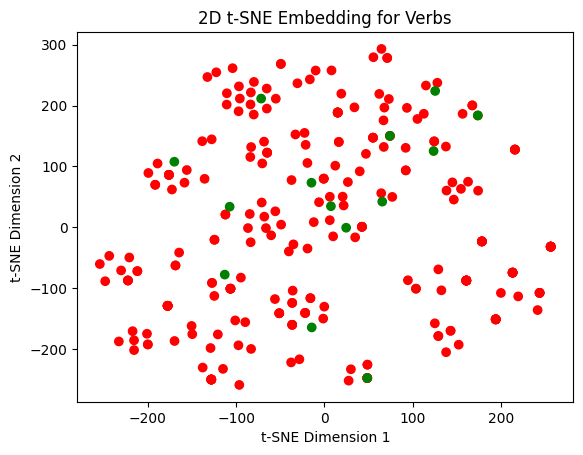

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

jitter = 0 

df2 = df[df['target_pos'] == '[\'VERB\']']

unique_values = df2['Targeted'].unique()

first_instance_indices = [df2[df2['Targeted'] == value].index[0] for value in unique_values]
subset_target_vectors = df2.loc[first_instance_indices, 'target_vectors']

subset_target_vectors


gen_arrays =  [np.array(_) for _ in df2['gen_vectors']]
target_arrays = [np.array(_) for _ in subset_target_vectors]

arrays = gen_arrays + target_arrays
X = np.array(arrays)

gen_colors  = ['r' for _ in gen_arrays]
target_colors = ['g' for _ in target_arrays]
colors = gen_colors + target_colors


# Perform 2D t-SNE embedding
tsne = TSNE(n_components=2, 
            perplexity = 20,
            learning_rate = 'auto',
            random_state=35)

tsne_result = tsne.fit_transform(X)

tsne_result_jittered = tsne_result + np.random.normal(0, jitter, tsne_result.shape)

# scatter plot of the jittered t-SNE embedding
plt.scatter(tsne_result_jittered[:, 0], tsne_result_jittered[:, 1], c = colors)
plt.title('2D t-SNE Embedding for Verbs')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

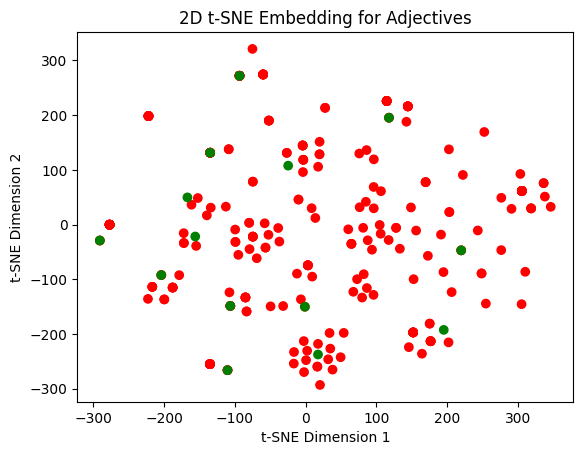

In [8]:
jitter = 0  

df2 = df[df['target_pos'] == '[\'ADJ\']']

unique_values = df2['Targeted'].unique()

first_instance_indices = [df2[df2['Targeted'] == value].index[0] for value in unique_values]
subset_target_vectors = df2.loc[first_instance_indices, 'target_vectors']

subset_target_vectors


gen_arrays =  [np.array(_) for _ in df2['gen_vectors']]
target_arrays = [np.array(_) for _ in subset_target_vectors]

arrays = gen_arrays + target_arrays
X = np.array(arrays)

gen_colors  = ['r' for _ in gen_arrays]
target_colors = ['g' for _ in target_arrays]
colors = gen_colors + target_colors


# Perform 2D t-SNE embedding
tsne = TSNE(n_components=2, 
            perplexity = 20,
            learning_rate = 'auto',
            random_state=35)

tsne_result = tsne.fit_transform(X)

tsne_result_jittered = tsne_result + np.random.normal(0, jitter, tsne_result.shape)

# scatter plot of the jittered t-SNE embedding
plt.scatter(tsne_result_jittered[:, 0], tsne_result_jittered[:, 1], c = colors)
plt.title('2D t-SNE Embedding for Adjectives')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

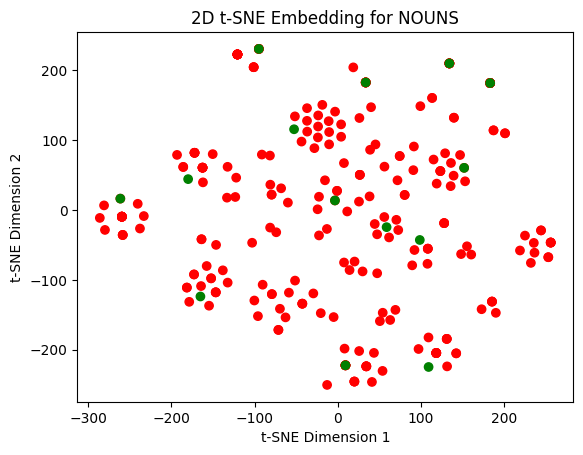

In [9]:
jitter = 0 

df2 = df[df['target_pos'] == '[\'NOUN\']']

unique_values = df2['Targeted'].unique()

first_instance_indices = [df2[df2['Targeted'] == value].index[0] for value in unique_values]
subset_target_vectors = df2.loc[first_instance_indices, 'target_vectors']

subset_target_vectors


gen_arrays =  [np.array(_) for _ in df2['gen_vectors']]
target_arrays = [np.array(_) for _ in subset_target_vectors]

arrays = gen_arrays + target_arrays
X = np.array(arrays)

gen_colors  = ['r' for _ in gen_arrays]
target_colors = ['g' for _ in target_arrays]
colors = gen_colors + target_colors


# Perform 2D t-SNE embedding
tsne = TSNE(n_components=2, 
            perplexity = 20,
            learning_rate = 'auto',
            random_state=35)

tsne_result = tsne.fit_transform(X)

tsne_result_jittered = tsne_result + np.random.normal(0, jitter, tsne_result.shape)

# scatter plot of the jittered t-SNE embedding
plt.scatter(tsne_result_jittered[:, 0], tsne_result_jittered[:, 1], c = colors)
plt.title('2D t-SNE Embedding for NOUNS')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [ ]:
# Create a defaultdict to store distances for each target word
distances = defaultdict(list)

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    target_word_embedding = row['og_target_vectors']
    generated_word_embedding = row['og_gen_vectors']
    
    # Check if the embeddings are strings, if so, try to convert them to numerical arrays
    if isinstance(target_word_embedding, str) and isinstance(generated_word_embedding, str):
        try:
            target_word_embedding = np.fromstring(target_word_embedding[1:-1], sep=' ')
            generated_word_embedding = np.fromstring(generated_word_embedding[1:-1], sep=' ')
        except ValueError:
            print(f"Skipping row {index} because the embeddings could not be converted to numerical arrays")
            continue
    
    # Check if the embeddings are numerical arrays
    if not isinstance(target_word_embedding, np.ndarray) or not isinstance(generated_word_embedding, np.ndarray):
        print(f"Skipping row {index} because the embeddings are not numerical arrays")
        continue
    
    # Flatten the embeddings to make them 1-D arrays
    target_word_embedding = np.ravel(target_word_embedding)
    generated_word_embedding = np.ravel(generated_word_embedding)
    
    # Calculate cosine similarity between target and generated word embeddings
    distance = cosine(target_word_embedding, generated_word_embedding)
    
    # Append the distance to the corresponding target word in the defaultdict
    distances[row['Targeted']].append(distance)

# Calculate the average semantic distance for each target word
average_distances = {target_word: np.mean(dist) for target_word, dist in distances.items()}

print(average_distances)
